# U.S. Medical Insurance Costs

In [283]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df = pd.read_csv("./insurance.csv")
df.head(10)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### A brief look at all our columns, checking for any missing values and the datatype they have compared to the data within.

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Performing summary statistics on our entire dataset.

In [285]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## What is the average age of all the patients?

In [286]:
get_average_age = np.mean(df["age"])
print(f"Average Age for all patient is {round(get_average_age, 2)}")

Average Age for all patient is 39.21


## Does older age group pays more for insurance cost?

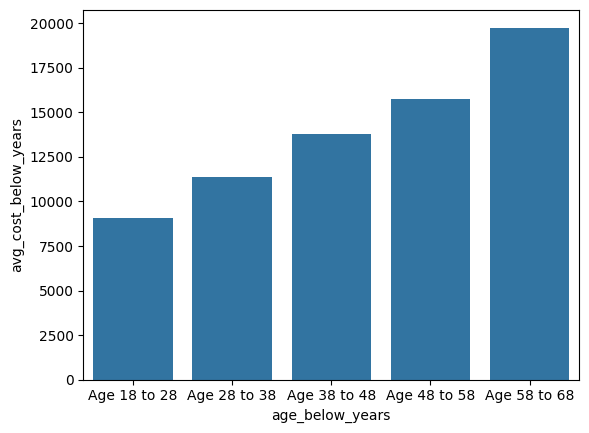

In [287]:
age_group = []
age_gap = 10
for year in range(df.age.min(), df.age.max()+1, age_gap):
    charges_age_based = df[(df.age >= year) & (df.age <= (year + age_gap))].charges
    age_group += [{"age_below_years": f"Age {year} to {year + age_gap}",
                  "avg_cost_below_years": np.mean(charges_age_based)}]

age_cost_df = pd.DataFrame(age_group)
sns.barplot(age_cost_df, x="age_below_years", y="avg_cost_below_years")
plt.show()
plt.close()

## From which location majority of our patients came from?

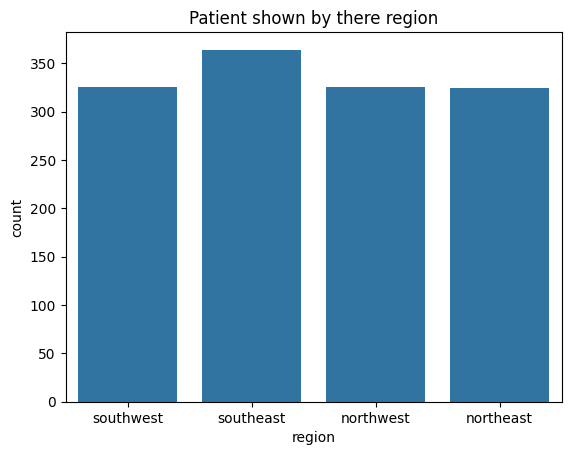

As we can see that majority of patients came from southeast 364


In [288]:
get_patient_region_count = df["region"].value_counts()
get_majority_patient_region = get_patient_region_count.keys()[0]
sns.countplot(x="region", data=df)
plt.title("Patient shown by there region")
plt.show()
plt.close()
print(f"As we can see that majority of patients came from {get_majority_patient_region} {get_patient_region_count[get_majority_patient_region]}")

## Are patients insurance charge higher, if they live in a specific region?

In our analysis, southeast is showing higher charges but that is because majority of the patients are from that area (Check bar chart above for reference).  
From the boxplot, we can clearly see there is no relationship between insurance cost and a patients location.

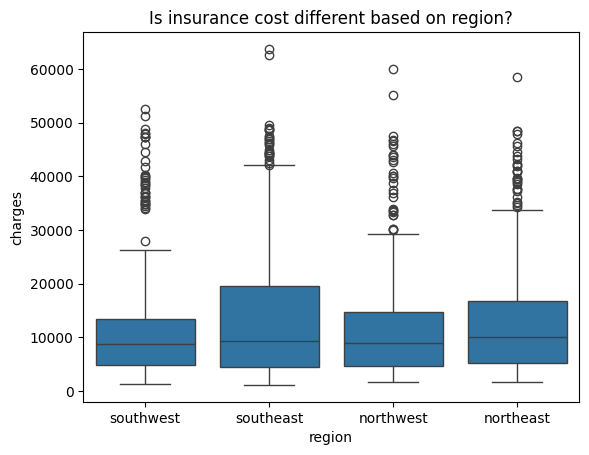

In [289]:
sns.boxplot(data=df, x="region", y="charges")
plt.title("Is insurance cost different based on region?")
plt.show()
plt.close()

## Checking cost difference between smoker and non-smoker

In [290]:
smokers = df[df["smoker"] == "yes"]
insurance_cost_smokers = round(np.mean(smokers.charges), 2)

non_smokers = df[df["smoker"] == "no"]
insurance_cost_non_smokers = round(np.mean(non_smokers.charges), 2)

print(f"The average insurance cost for smokers (${insurance_cost_smokers}), which is much higher than the cost for non-smokers (${insurance_cost_non_smokers}).\n\
The average difference in both the costs amount to ${insurance_cost_smokers - insurance_cost_non_smokers}.")

The average insurance cost for smokers ($32050.23), which is much higher than the cost for non-smokers ($8434.27).
The average difference in both the costs amount to $23615.96.


## Finding out the average age of all the patients who has 1 or more childrens.

In [291]:
parents = df[df.children >= 1]
avg_age_of_parents = round(np.mean(parents.age), 2)
print(f"Average age of patients who has atleast one children is {avg_age_of_parents}")

Average age of patients who has atleast one children is 39.78


## What is the ratio of men and women who are a smoker?


Out of all the patients in the data, 20% are smoker thats 1/5<sup>th</sup> of 1338 patients.  
The ratio of men : women smoker is 23% : 17% of all the patients, showing men smoke much more than women.

In our dataset, out of all the male patients 23.52% are smokers.
In our dataset, out of all the female patients 17.37% are smokers.
In our dataset, 20.48% of the patients are smokers. 
Out of these smokers, 58.03% are male and 41.97% are female.


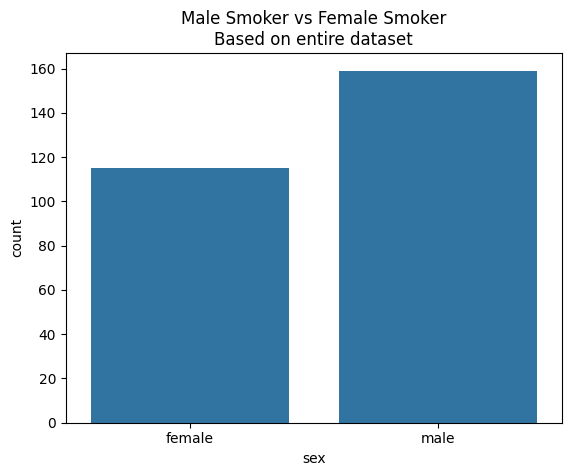

In [292]:
male_smoker = df[(df["sex"] == "male") & (df["smoker"] == "yes")]
total_male_patients = df[df.sex == "male"]
male_patient_smoking_proportion = round(len(male_smoker) / len(total_male_patients), 4) * 100
print(f"In our dataset, out of all the male patients {male_patient_smoking_proportion}% are smokers.")

female_smoker = df[(df.sex == "female") & (df.smoker == "yes")]
total_female_patients = df[df.sex == "female"]
female_patient_smoking_proportion = round(len(female_smoker) / len(total_female_patients), 4) * 100
print(f"In our dataset, out of all the female patients {female_patient_smoking_proportion}% are smokers.")

smoker_proportion = round(len(smokers) / len(df), 4) * 100
male_smoker_proportion = round(len(male_smoker) / len(smokers), 4) * 100
female_smoker_proportion = round(len(female_smoker) / len(smokers), 4) * 100
print(f"In our dataset, {smoker_proportion}% of the patients are smokers. \n\
Out of these smokers, {male_smoker_proportion}% are male and {female_smoker_proportion}% are female.")

sns.countplot(x="sex", data=smokers)
plt.title("Male Smoker vs Female Smoker\nBased on entire dataset")
plt.show()
plt.close()

## Does smokers pay more for their insurance cost?

As we can see from our below analysis, insurance cost for smoker and non-smoker are highly associative. Meaning, we can say with a very high certainity, if a patient is a smoker he has higher insurance cost compared to a non-smoker.

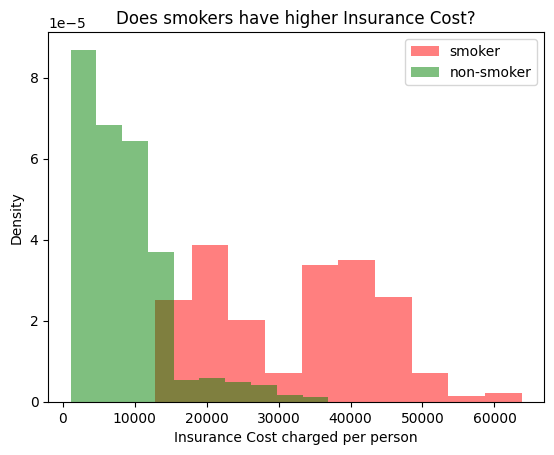

In [293]:
plt.hist(smokers.charges, color="red", label="smoker", density=True, alpha=0.5)
plt.hist(non_smokers.charges, color="green", label="non-smoker", density=True, alpha=0.5)
plt.legend()
plt.title("Does smokers have higher Insurance Cost?")
plt.xlabel("Insurance Cost charged per person")
plt.ylabel("Density")
plt.show()
plt.close()


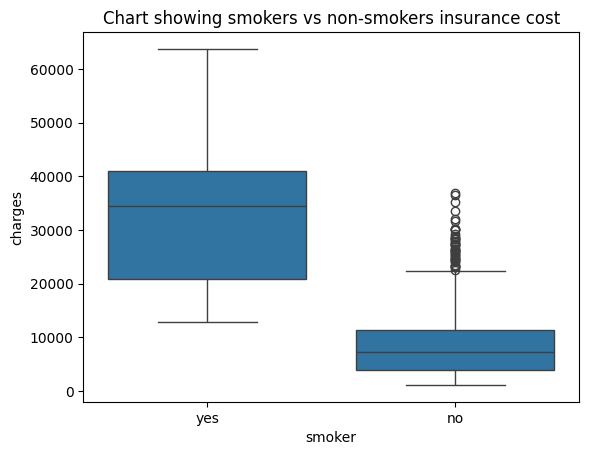

In [294]:
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Chart showing smokers vs non-smokers insurance cost")
plt.show()
plt.close()

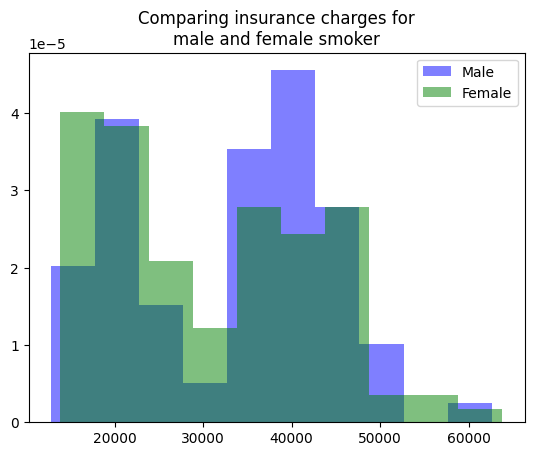

In [295]:
plt.hist(male_smoker.charges, color="blue", label="Male", density=True, alpha=0.5)
plt.hist(female_smoker.charges, color="green", label="Female", density=True, alpha=0.5)
plt.title("Comparing insurance charges for\nmale and female smoker")
plt.legend()
plt.show()
plt.close()

## Does a persons gender play any factor in the cost of insurance?

It is very clear from the below charts that there is no relationship between the insurance charge of male and female.

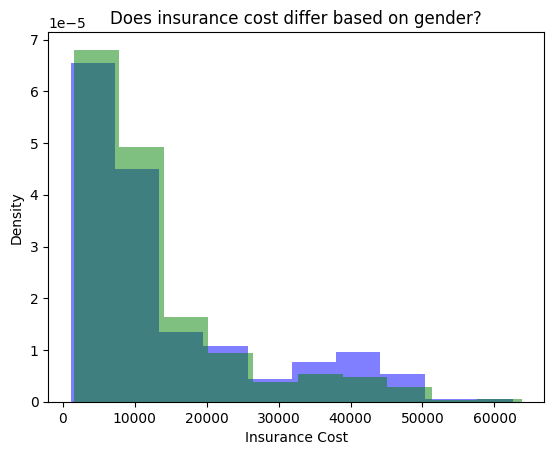

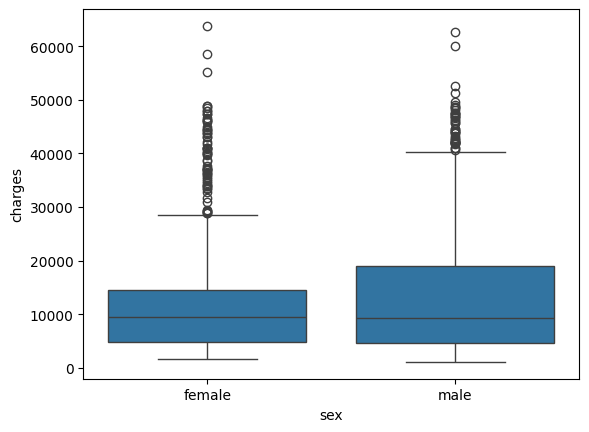

In [296]:
plt.hist(df[df.sex == "male"].charges, color="blue", label="Male", density=True, alpha=0.5)
plt.hist(df[df.sex == "female"].charges, color="green", label="Male", density=True, alpha=0.5)
plt.title("Does insurance cost differ based on gender?")
plt.xlabel("Insurance Cost")
plt.ylabel("Density")
plt.show()
plt.close()
sns.boxplot(data=df, x="sex", y="charges")
plt.show()
plt.close()

## Does a female patient with children affect insurance charge and does higher children count means more insurance charge?

As per our analysis below, having more children does not affect the insurance charges.
> There are cases where mothers with 5 children are paying less than $10k. (Refer to the table below)

      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
166    20  female  37.000         5     no  southwest   4830.63000
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
937    39  female  24.225         5     no  northwest   8965.79575
969    39  female  34.320         5     no  southeast   8596.82780
1085   39  female  18.300         5    yes  southwest  19023.26000
1130   39  female  23.870         5     no  southeast   8582.30230


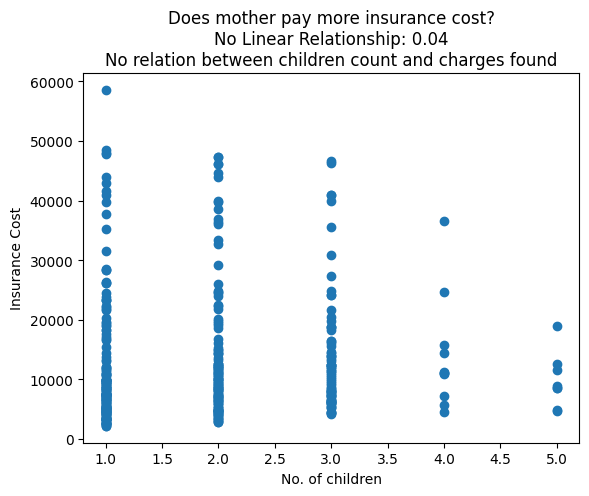

In [297]:
mother_patient = df[(df.sex == "female") & (df.children > 0)]
print(mother_patient[mother_patient.children == 5])

mother_insurance_correlation, p = pearsonr(mother_patient.children, mother_patient.charges)
plt.scatter(mother_patient.children, mother_patient.charges)
plt.title(f"Does mother pay more insurance cost?\n\
No Linear Relationship: {round(mother_insurance_correlation, 2)}\n\
No relation between children count and charges found")
plt.xlabel("No. of children")
plt.ylabel("Insurance Cost")
plt.show()
plt.close()

## Does age affects BMI?does higher BMI means higher cost of insurance?
>[!NOTE]BMI Categories
>- Underweight: Below 18.5
>- Healthy Weight: 18.–24.9
>- Overweight: 25.0–29.9
>- Obesity: 30.0 and Above

From our analysis below, we can say that there is low relationship between age and bmi, older patient does not mean higher bmi.

0.10927188154853518


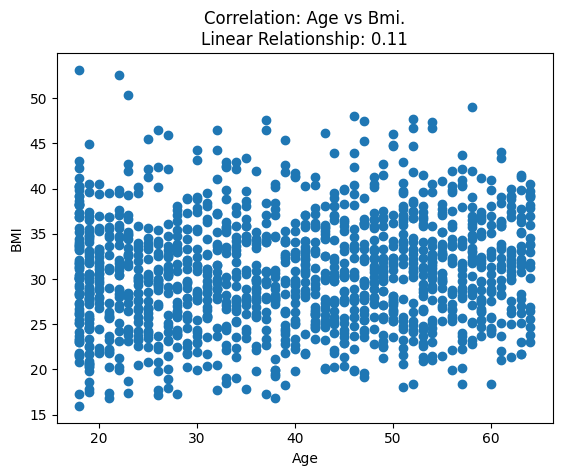

In [298]:
age_bmi_correlation, p =pearsonr(df.age, df.bmi)
print(age_bmi_correlation)
plt.scatter(df.age, df.bmi)
plt.title(f"Correlation: Age vs Bmi.\nLinear Relationship: {round(age_bmi_correlation, 2)}")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()
plt.close()

## Does higher BMI means higher cost of insurance?
>[!NOTE]BMI Categories
>- Underweight: Below 18.5
>- Healthy Weight: 18.–24.9
>- Overweight: 25.0–29.9
>- Obesity: 30.0 and Above

After checking the relationship between bmi and insurance cost, we can say there is linear relationship between them and can result in higher insurance charges if patient has higher bmi.

0.1983409688336288


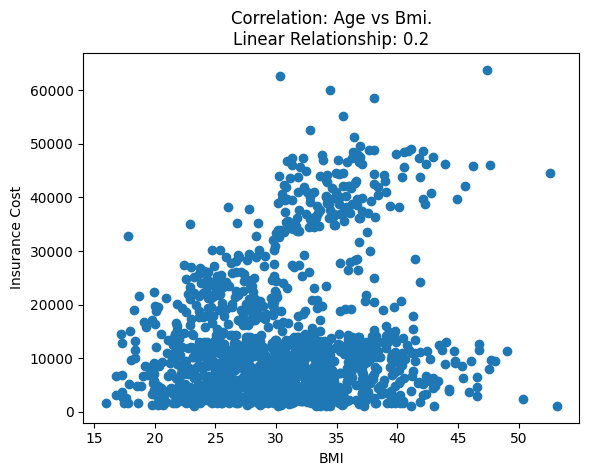

In [299]:
bmi_charge_correlation, p =pearsonr(df.bmi, df.charges)
print(bmi_charge_correlation)
plt.scatter(df.bmi, df.charges)
plt.title(f"Correlation: Age vs Bmi.\nLinear Relationship: {round(bmi_charge_correlation, 2)}")
plt.xlabel("BMI")
plt.ylabel("Insurance Cost")
plt.show()
plt.close()